# Logistic Regression

Data:

The goal in this notebook is to present how does a logistic regression model actually works. For this purpouse I will implement the gradient descent algorithm by hand and compare the results of sklearn. This exercise is inspired by the Andrew Ng course of Machine Learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Formating
%matplotlib notebook
pd.options.display.max_rows = 15
pd.options.display.float_format = '{:0,.02f}'.format

(40, 3)
       exam_one  exam_two  is_admitted
count     40.00     40.00        40.00
mean      52.03     54.62         0.00
std       17.55     16.08         0.00
min       30.06     30.60         0.00
25%       35.71     42.81         0.00
50%       50.41     49.70         0.00
75%       61.93     63.59         0.00
max       95.86     98.87         0.00
(60, 3)
       exam_one  exam_two  is_admitted
count     60.00     60.00        60.00
mean      74.72     73.96         1.00
std       14.91     16.01         0.00
min       40.46     43.39         1.00
25%       63.60     65.41         1.00
50%       75.44     74.75         1.00
75%       84.68     87.44         1.00
max       99.83     97.72         1.00


<IPython.core.display.Javascript object>


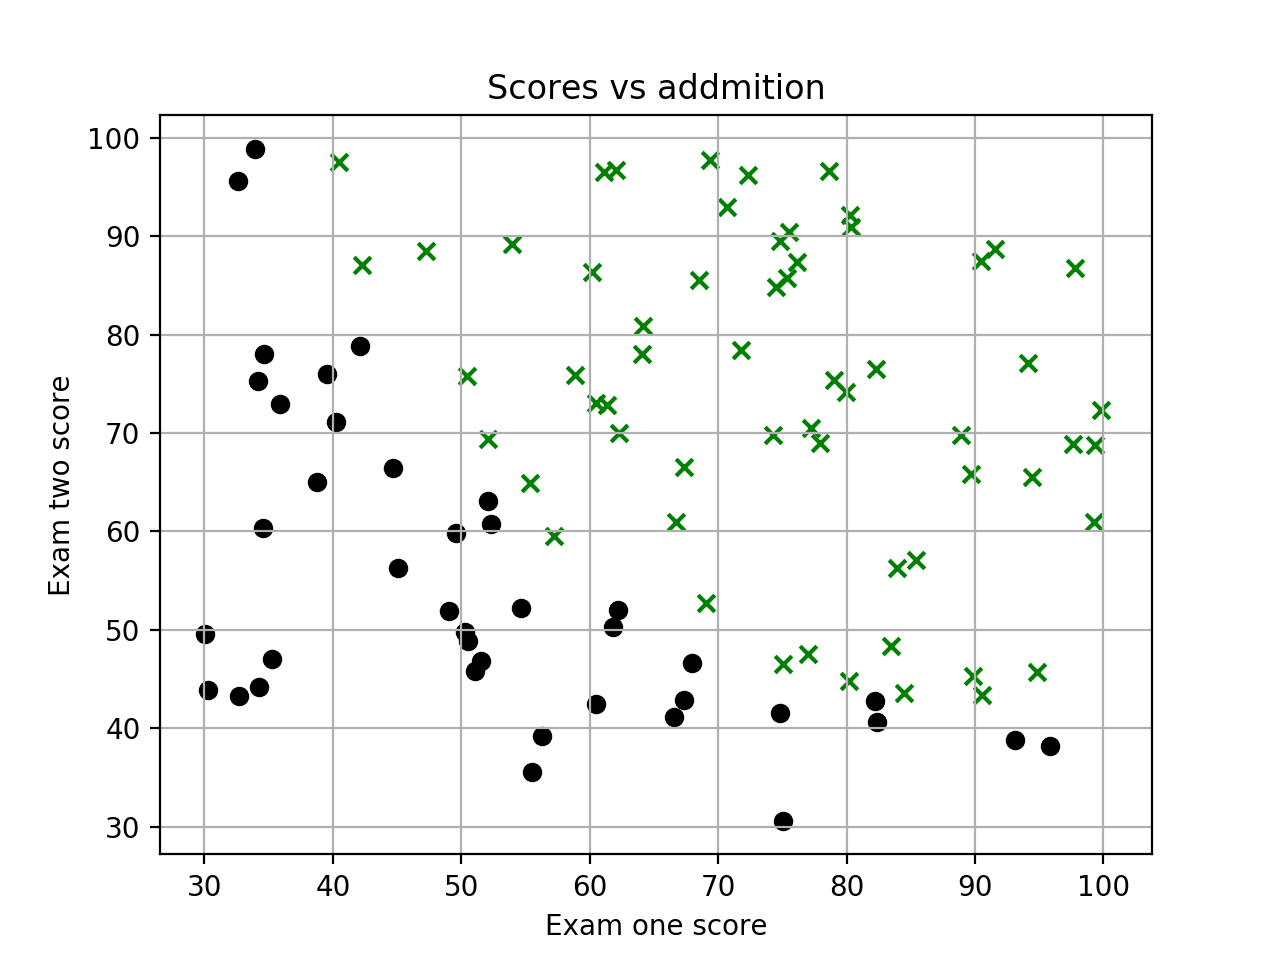

In [2]:
data = pd.read_csv('data/student_scores.csv')
m = data.shape[0]

pos_data = data[data.is_admitted == 0]
neg_data = data[data.is_admitted == 1]

print(pos_data.shape)
print(pos_data.describe())
print(neg_data.shape)
print(neg_data.describe())

def plot_data(pos_data, neg_data):
    fig, ax = plt.subplots()

    ax.set_title('Scores vs addmition')

    ax.scatter(pos_data.exam_one, pos_data.exam_two, c='k', marker='o')
    ax.scatter(neg_data.exam_one, neg_data.exam_two, c='g', marker='x')

    ax.set_xlabel('Exam one score')
    ax.set_ylabel('Exam two score')

    ax.grid()

plot_data(pos_data, neg_data)

In [6]:
import math

def sigmoid(z):
    return 1/(1 + np.power(math.e, -z))

# Sigmoid should work with matrices applying to every element
print(sigmoid(np.matrix('1 0; 3 4; -1 -2')))

[[ 0.73105858  0.5       ]
 [ 0.95257413  0.98201379]
 [ 0.26894142  0.11920292]]


In [7]:
def get_cost(theta, X, y):
    h_theta = sigmoid(X.dot(theta))
    pos_cost = np.multiply(-y, np.log(h_theta))
    neg_cost = np.multiply(1 - y, np.log(1 - h_theta))
    
    return np.sum(pos_cost - neg_cost) / y.size

def get_gradient(theta, X, y):
    h_theta = sigmoid(X.dot(theta))
    scaled_features = X * (h_theta - y).reshape(y.size, 1)

    return scaled_features.sum(axis=0)/y.size

In [8]:
X = data.iloc[:, :2]
X.insert(0, 'ones', 1)
X = X.as_matrix()
y = data.is_admitted.values

In [9]:
initial_theta = np.array([0, 0, 0])
print(initial_theta.shape)
print('Cost with initial theta [0, 0, 0]:', get_cost(initial_theta, X, y))
print('Gradients with initial theta [0, 0, 0]:', get_gradient(initial_theta, X, y))

(3,)
Cost with initial theta [0, 0, 0]: 0.69314718056
Gradients with initial theta [0, 0, 0]: [ -0.1        -12.00921659 -11.26284221]


In [10]:
theta1 = np.array([-24, 0.2, 0.2])
print(get_cost(theta1, X, y))
print(get_gradient(theta1, X, y))

0.218330193827
[ 0.04290299  2.56623412  2.64679737]


In [11]:
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.fmin_bfgs.html
from scipy.optimize import fmin_bfgs
result = fmin_bfgs(get_cost, theta1, fprime=get_gradient, args=(X, y), full_output=True)
(theta_bfgs, _, _, _, bfgs_iteration_count, _, _) = result
print(theta_bfgs, bfgs_iteration_count)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
[-25.16133175   0.2062317    0.20147159] 22


In [12]:
def gradient_descent(X, y, theta, alpha, iterations, delta_epsilon):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        if len(cost_history) > 2:
            cost_delta = cost_history[i - 2] - cost_history[i-1]
            if abs(cost_delta) <= delta_epsilon:
                break

        partials = get_gradient(theta, X, y)
        theta = theta - alpha * partials.T
        cost_history.append(get_cost(theta, X, y))

    return theta, cost_history

<IPython.core.display.Javascript object>


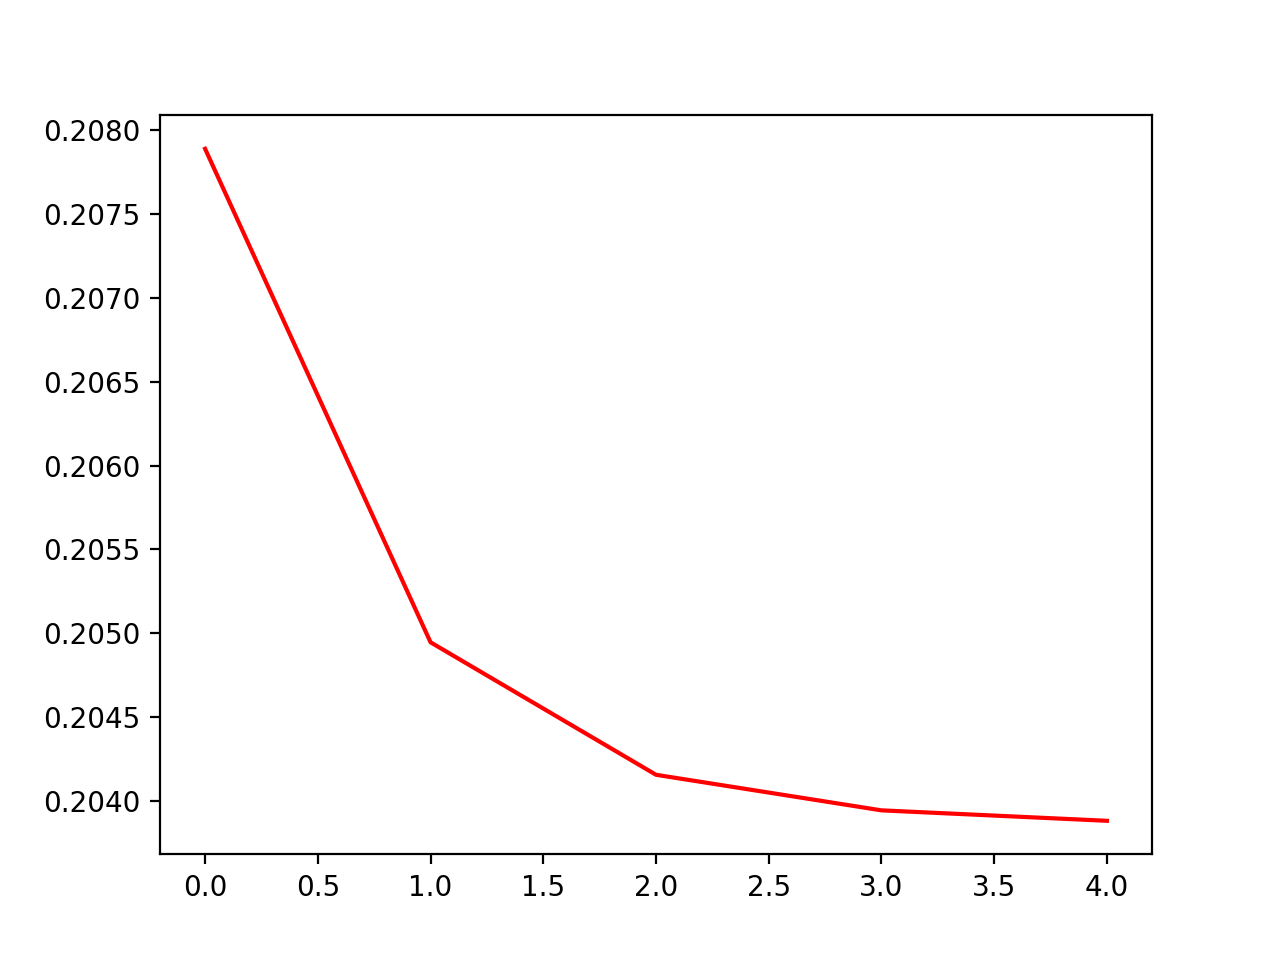

Comparing BFGS and gradient descent: [-24.00008743   0.19504675   0.19442364] [-25.16133175   0.2062317    0.20147159] [ 1.16124432 -0.01118494 -0.00704795] Iterations: 5 22


In [13]:
max_grad_iterations = 500
step_size = 0.001
delta_epsilon = 0.0001
theta, cost_history = gradient_descent(X, y, theta1, step_size, max_grad_iterations, delta_epsilon)
plt.figure()
plt.plot(cost_history, color="r")
print('Comparing BFGS and gradient descent:', theta, theta_bfgs, theta-theta_bfgs, 'Iterations:', len(cost_history), bfgs_iteration_count)

<IPython.core.display.Javascript object>


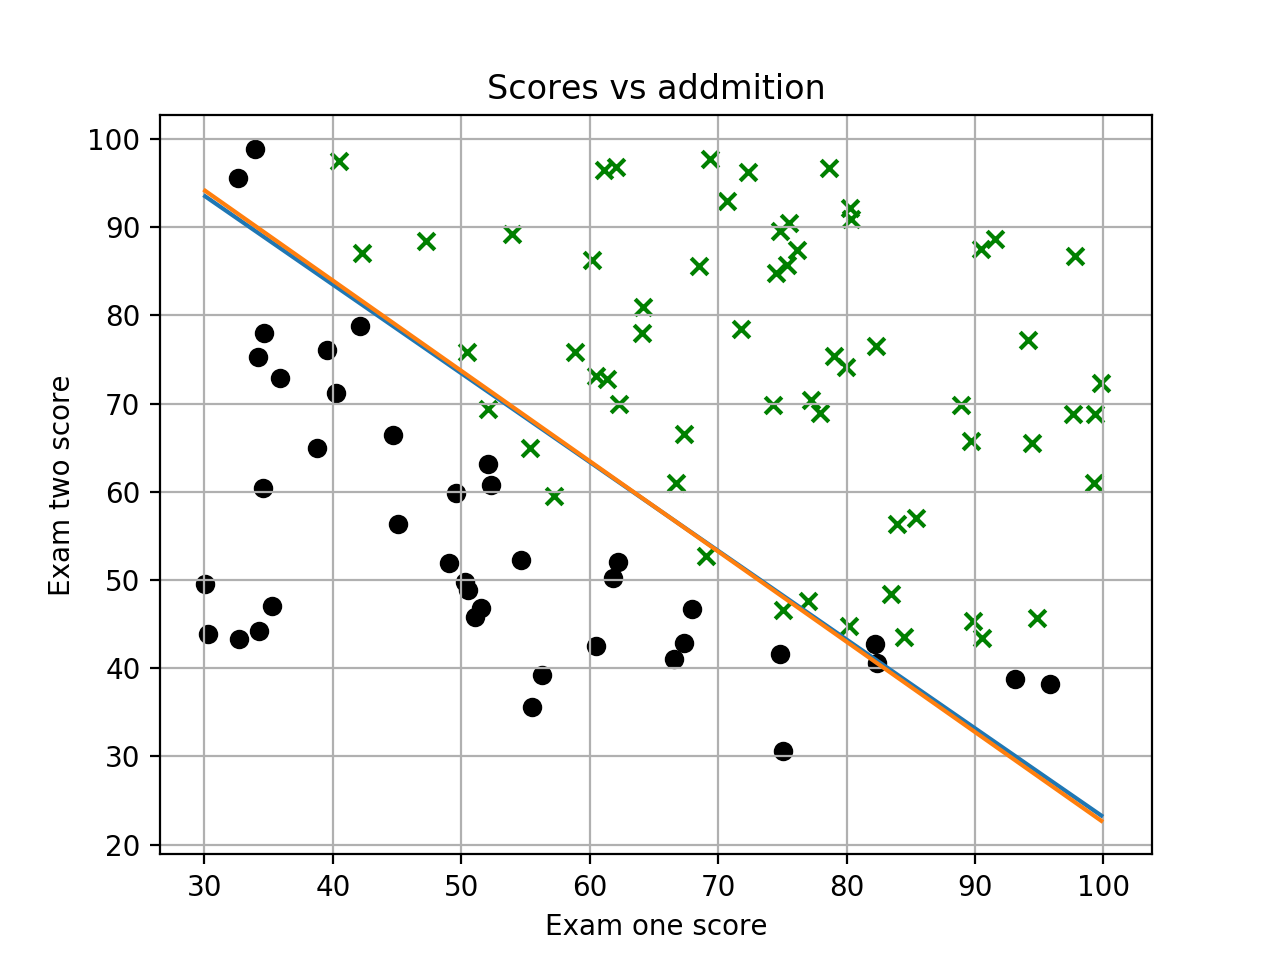

In [251]:
x_min = min(data[['exam_one', 'exam_two']].min())
x_max = max(data[['exam_one', 'exam_two']].max())

xs = np.linspace(x_min, x_max)

plot_data(pos_data, neg_data)
# Plot Decision Boundary

def plot_decision_boundary(theta, xs):
    plt.plot(xs, (theta.item(0) + xs*theta.item(1))/-theta.item(2))

plot_decision_boundary(theta, xs)
plot_decision_boundary(theta_bfgs, xs)

There is interesting observation from the results above:

Standard gradient descent with some small delta epsilon (`0.0001`) converges faster then the BFGS optimization algorithm. The end result is very close.

## Scoring:

In [14]:
print(sigmoid(np.array([1, 45, 85]).dot(theta)))

0.786343746333


In [15]:
@np.vectorize
def to_binary(x):
    if x >= 0.5:
        return 1
    else:
        return 0

def score(X, theta):
    return abs(to_binary(train_prediction) == y).mean() * 100

In [16]:
train_prediction = sigmoid(X.dot(theta))

In [17]:
print(score(X, theta))
print(score(X, theta_bfgs))

90.0
90.0


We get 90% accuracy with both optimization methods